In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

white= pd.read_csv('winequality-white.csv',sep=';')
red= pd.read_csv('winequality-red.csv',sep=';')

In [84]:
red['type'] = 'red'
white['type'] = 'white'
wines = pd.concat([red, white], ignore_index=True)
print(wines.head(3))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  


In [71]:
print(red.describe())
print(white.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [72]:
#wie ist der Alkoholdurchschnitt der Weine nach Qualität und Farbe?
print(wines.groupby(['type','quality'])['alcohol'].mean())

type   quality
red    3           9.955000
       4          10.265094
       5           9.899706
       6          10.629519
       7          11.465913
       8          12.094444
white  3          10.345000
       4          10.152454
       5           9.808840
       6          10.575372
       7          11.367936
       8          11.636000
       9          12.180000
Name: alcohol, dtype: float64


In [75]:
#Anteil der Qualitäten
counts = wines['quality'].value_counts().sort_index()
anteil = (counts/counts.sum())*100
tabelle = pd.DataFrame({
    'Anzahl': counts,
    'Anteil (%)': anteil.round(2)
})

print(tabelle)

         Anzahl  Anteil (%)
quality                    
3            30        0.46
4           216        3.32
5          2138       32.91
6          2836       43.65
7          1079       16.61
8           193        2.97
9             5        0.08


In [76]:
#liegt eine Normalverteilung des Zucker vor

sugar_skew = wines['residual sugar'].skew()
print(sugar_skew.round(2), '-> rechtsschief, also gibt es keine Normalverteilung')

1.44 -> rechtsschief, also gibt es keine Normalverteilung


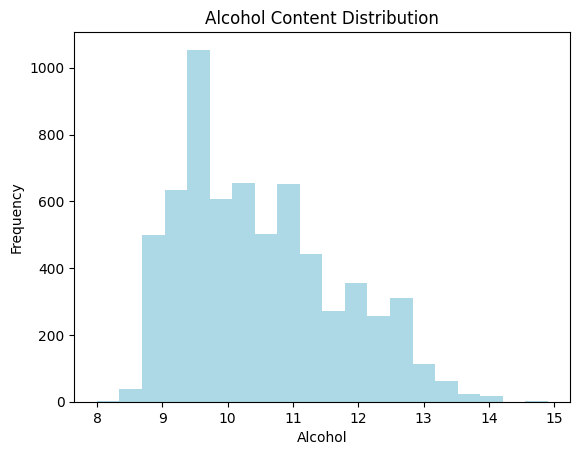

In [110]:
wines['alcohol'].plot(kind='hist', bins=20, title='Alcohol Content Distribution', color='lightblue')
plt.xlabel('Alcohol')
plt.show()

Text(0, 0.5, 'Anzahl der Weine')

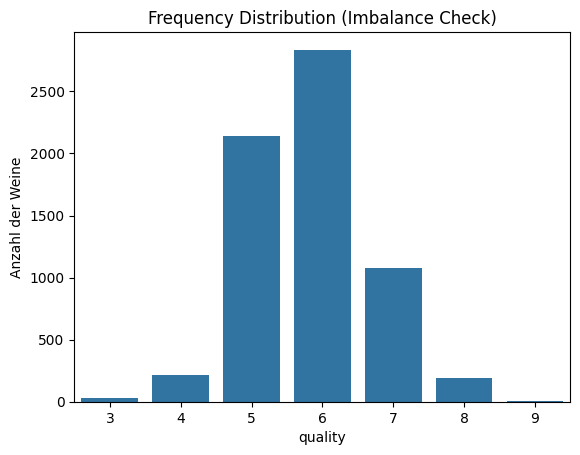

In [96]:
# Plot 1: Bar Plot for Counts (Frequency Distribution)
sns.countplot(x='quality', data=wines)
plt.title('Frequency Distribution (Imbalance Check)')
plt.ylabel('Anzahl der Weine')

Text(0.5, 1.0, 'Boxplot: Alkohol vs Qualität')

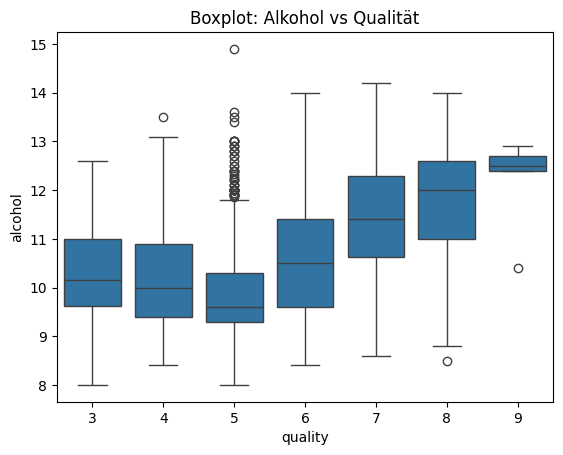

In [99]:
sns.boxplot(x='quality', y='alcohol', data=wines)
plt.title('Boxplot: Alkohol vs Qualität')


Text(0, 0.5, 'Anteil (0-1)')

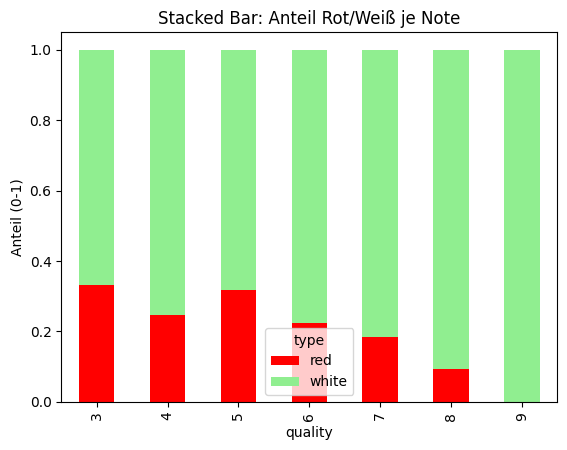

In [111]:
balken = pd.crosstab(wines['quality'], wines['type'])
balken.div(ct.sum(1), axis=0).plot(kind='bar', stacked=True, ax=plt.gca(), color=['red', 'lightgreen'])
plt.title('Stacked Bar: Anteil Rot/Weiß je Note')
plt.ylabel('Anteil (0-1)')

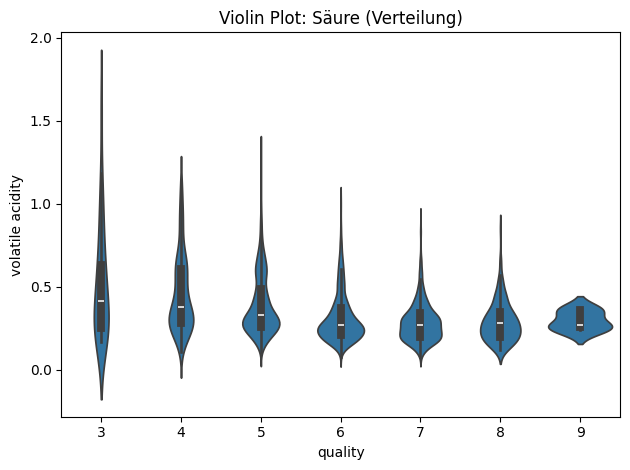

In [114]:
sns.violinplot(x='quality', y='volatile acidity', data=wines)
plt.title('Violin Plot: Säure (Verteilung)')
plt.tight_layout()
plt.show()